Introduction :
This notebook covers analysis & modelling for Mercedes Car Manufacturing Data.

Approach Taken : 
Understand Data diminesions , data types and perform data analysis. Due to high diminesionality of dataset - indepth EDA cannot be performed 

Based on data analysis , there are 8 categorical columns that is converted using label encoder . 

Data is split into Train and test data sets  

PCA techique used to handle high dimensions. With PCA columns reduced from 378 to 80 columns 

Training data using Linear Regression model - Plain vanilla 

Training data using Linear Regression model with PCA



   

#Import Packages & Read Data

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

In [32]:
df= pd.read_csv("/content/train.csv")
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


#Attribute information
This dataset contains an anonymized set of variables (X0 to X385), each representing a custom feature in a Mercedes car. 
** Note: This is confidential data and we will not be able to provide description for each of the anonymized set of variables.

For example, a variable could be 4WD, added air suspension, or a head-up display.

The ground truth is labeled ‘y’ and represents the time (in seconds) that the car took to pass testing for each variable.


#Data Analysis 

In [33]:
df.shape

(4209, 378)

In [34]:
df.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


##Data Analysis 
Dataset has 4209 rows and 378 columns ( Multi-demensional data)

No missing values 

8 columns  have cateogrical data ,370 columns have numberical data , including output variable 

Output variable is - continuous discreate datatype 




#Label Encoding for categorical variables 

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le=LabelEncoder()
cat= df[["X0","X1","X2","X3","X4","X5","X6","X8"]]
for column in cat.columns:
  cat[column]=le.fit_transform(cat[column])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [38]:
cat
#all variables now converted to numeric 

,X0,X1,X2,X3,X4,X5,X6,X8
0,32,23,17,0,3,24,9,14
1,32,21,19,4,3,28,11,14
2,20,24,34,2,3,27,9,23
3,20,21,34,5,3,27,11,4
4,20,23,34,5,3,12,3,13
...,...,...,...,...,...,...,...,...
4204,8,20,16,2,3,0,3,16
4205,31,16,40,3,3,0,7,7
4206,8,23,38,0,3,0,6,4
4207,9,19,25,5,3,0,11,20


In [39]:
#Drop columns and concatenate label endcoded columns to dataframe 
df1=df.drop(["ID","X0","X1","X2","X3","X4","X5","X6","X8"], axis=1)
df2= pd.concat([cat,df1], axis=1)

In [40]:
df2

,X0,X1,X2,X3,X4,X5,X6,X8,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,130.81,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,88.53,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,76.26,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,80.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,78.02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8,20,16,2,3,0,3,16,107.39,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4205,31,16,40,3,3,0,7,7,108.77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4206,8,23,38,0,3,0,6,4,109.22,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4207,9,19,25,5,3,0,11,20,87.48,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


#Descriptive statistics 

In [41]:
data=df2.describe().T
data

,count,mean,std,min,25%,50%,75%,max
X0,4209.0,29.760751,13.738338,0.0,19.0,35.0,43.0,46.0
X1,4209.0,11.113566,8.531001,0.0,3.0,13.0,20.0,26.0
X2,4209.0,17.306486,10.899914,0.0,8.0,16.0,25.0,43.0
X3,4209.0,2.919696,1.739912,0.0,2.0,2.0,5.0,6.0
X4,4209.0,2.997862,0.073900,0.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...
X380,4209.0,0.008078,0.089524,0.0,0.0,0.0,0.0,1.0
X382,4209.0,0.007603,0.086872,0.0,0.0,0.0,0.0,1.0
X383,4209.0,0.001663,0.040752,0.0,0.0,0.0,0.0,1.0
X384,4209.0,0.000475,0.021796,0.0,0.0,0.0,0.0,1.0


Observations :

1. high variance in mean and median points for X0 to X8 data columns
2. rest of data columns have mostly values between 0-1
3. data is not normally distributed 


#Correlation Analysis 

In [42]:
# since there are 300+ columns , taking sample columns for coorelation analysis 
df2[["X0","X1","X2","X3","X4","X5","X6","X8","y"]].corr()

,X0,X1,X2,X3,X4,X5,X6,X8,y
X0,1.000000,-0.271123,-0.139904,-0.070645,0.017988,0.012293,0.037549,0.047735,-0.187081
X1,-0.271123,1.000000,0.088266,0.205657,-0.020724,0.046417,-0.079119,-0.000306,-0.003032
X2,-0.139904,0.088266,1.000000,-0.093546,0.002289,-0.017722,0.065778,-0.069932,0.078852
X3,-0.070645,0.205657,-0.093546,1.000000,0.015298,-0.008161,-0.048468,-0.001249,-0.150741
X4,0.017988,-0.020724,0.002289,0.015298,1.000000,0.039778,0.027854,-0.008909,-0.015272
X5,0.012293,0.046417,-0.017722,-0.008161,0.039778,1.000000,-0.019917,0.012746,-0.039031
X6,0.037549,-0.079119,0.065778,-0.048468,0.027854,-0.019917,1.000000,0.018565,0.004252
X8,0.047735,-0.000306,-0.069932,-0.001249,-0.008909,0.012746,0.018565,1.000000,0.003328
y,-0.187081,-0.003032,0.078852,-0.150741,-0.015272,-0.039031,0.004252,0.003328,1.000000


Almost all variables are independent 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87d1a13710>,
      dtype=object)

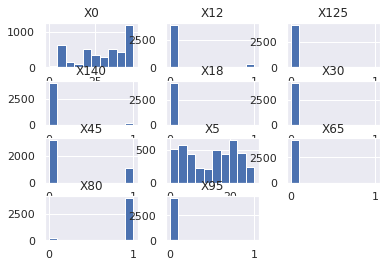

In [43]:
#sample variable to check data distribution 
df2[["X0","X5","X12","X18","X30","X45","X65","X80","X95","X125","X140"]].hist()

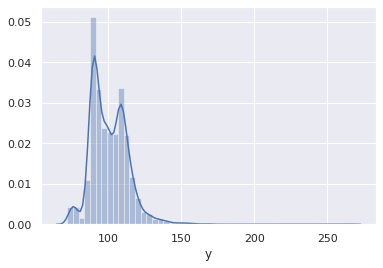

In [44]:
#output variable distribution 
sns.distplot(df2["y"])

Data distribution - Not normal 

#Train-Test split 

In [45]:
y=df2["y"]
df2.drop(["y"], axis=1, inplace=True)
#df2.drop(["ID"], axis=1, inplace=True)
X= df2


In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25, random_state=0)

#Data Normalization

In [47]:
#since data is not normally distributed, i will use minmax scaler 
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
X_train= scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [48]:
X_train

array([[0.67391304, 0.11538462, 0.06976744, ..., 0.        , 0.        ,
        0.        ],
       [0.7826087 , 0.5       , 0.37209302, ..., 0.        , 0.        ,
        0.        ],
       [0.97826087, 0.73076923, 0.1627907 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.86956522, 0.11538462, 0.37209302, ..., 0.        , 0.        ,
        0.        ],
       [0.93478261, 0.76923077, 0.37209302, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.88461538, 0.72093023, ..., 0.        , 0.        ,
        0.        ]])

#Apply PCA

PCA will be used for identify features wiht high variance and reduce demensionality of data 

In [49]:
from sklearn.decomposition import PCA

In [50]:
pca=PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [24]:
pca.components_

array([[ 6.75098967e-02, -9.65787385e-02,  4.63109948e-04, ...,
         3.97200185e-04, -1.65563939e-04, -9.44885672e-04],
       [-2.73939661e-02,  8.59985632e-02,  2.15490553e-02, ...,
         1.35684996e-04, -1.31191453e-04,  8.39226121e-05],
       [-3.49936281e-02, -1.63840099e-03,  2.87696831e-02, ...,
         8.42622030e-04, -2.45933109e-05, -1.44595809e-04],
       ...,
       [ 0.00000000e+00, -1.85116552e-18,  6.81426765e-19, ...,
         5.60353761e-18,  6.90626000e-18,  1.30010673e-15],
       [ 0.00000000e+00,  4.12241442e-16, -4.97490587e-16, ...,
         2.46330734e-16, -3.41740525e-16,  1.32523449e-02],
       [-0.00000000e+00,  3.55121941e-16,  4.55706182e-16, ...,
        -2.92734587e-16,  2.29200339e-16, -1.05057875e-02]])

In [51]:
pca.explained_variance_ratio_[:80].sum()

0.9566226856192724

80 variables giving 95% variance 

##Elbow plot 

Text(0, 0.5, 'No. of components')

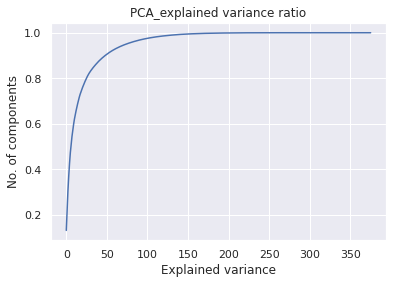

In [52]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
sns.set(style="darkgrid")
plt.title("PCA_explained variance ratio")
plt.xlabel("Explained variance")
plt.ylabel("No. of components")

##PCA with n-components 

In [53]:
#Apply pca on 80 variables 
x_pca=PCA(n_components=80)
train_pca= x_pca.fit_transform(X_train)
test_pca=x_pca.transform(X_test)

#Linear Regression -without PCA 

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score
lr1=LinearRegression()
lr1.fit(X_train,y_train)
lr_pred1= lr1.predict(X_test)
lr_tr_pred1= lr1.predict(X_train)

#model evaluation(compare train and test results )
mse1 = mean_squared_error(y_test,lr_pred1)
print ("mse for test data", mse1)
mse2 = mean_squared_error(y_train,lr_tr_pred1)
print ("mse for train data", mse2)
rmse1= np.sqrt(mse1)
print ("rmse for test data", rmse1)
rmse2= np.sqrt(mse2)
print ("rmse for train data", rmse2)

mse for test data 6.490391304497803e+20
mse for train data 58.376863640480565
rmse for test data 25476246396.39404
rmse for train data 7.640475354353325


#Linear Regression - PCA features 

In [55]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_pca,y_train)
lr_pred= lr.predict(test_pca)
lr_tr_pred=lr.predict(train_pca)

#model evaluation (compare train and test results )
mse1 = mean_squared_error(y_test,lr_pred)
print ("mse for test data", mse1)
mse2 = mean_squared_error(y_train,lr_tr_pred)
print ("mse for train data", mse2)
rmse1= np.sqrt(mse1)
print ("rmse for test data", rmse1)
rmse2= np.sqrt(mse2)
print ("rmse for train data", rmse2)

mse for test data 95.9484150671328
mse for train data 66.57365974855176
rmse for test data 9.79532618482574
rmse for train data 8.159268334143189


RMSE value shows significant improvement on PCA model . 

Train and Test data is very close , thus we can conclude this to be a good model 

The End